 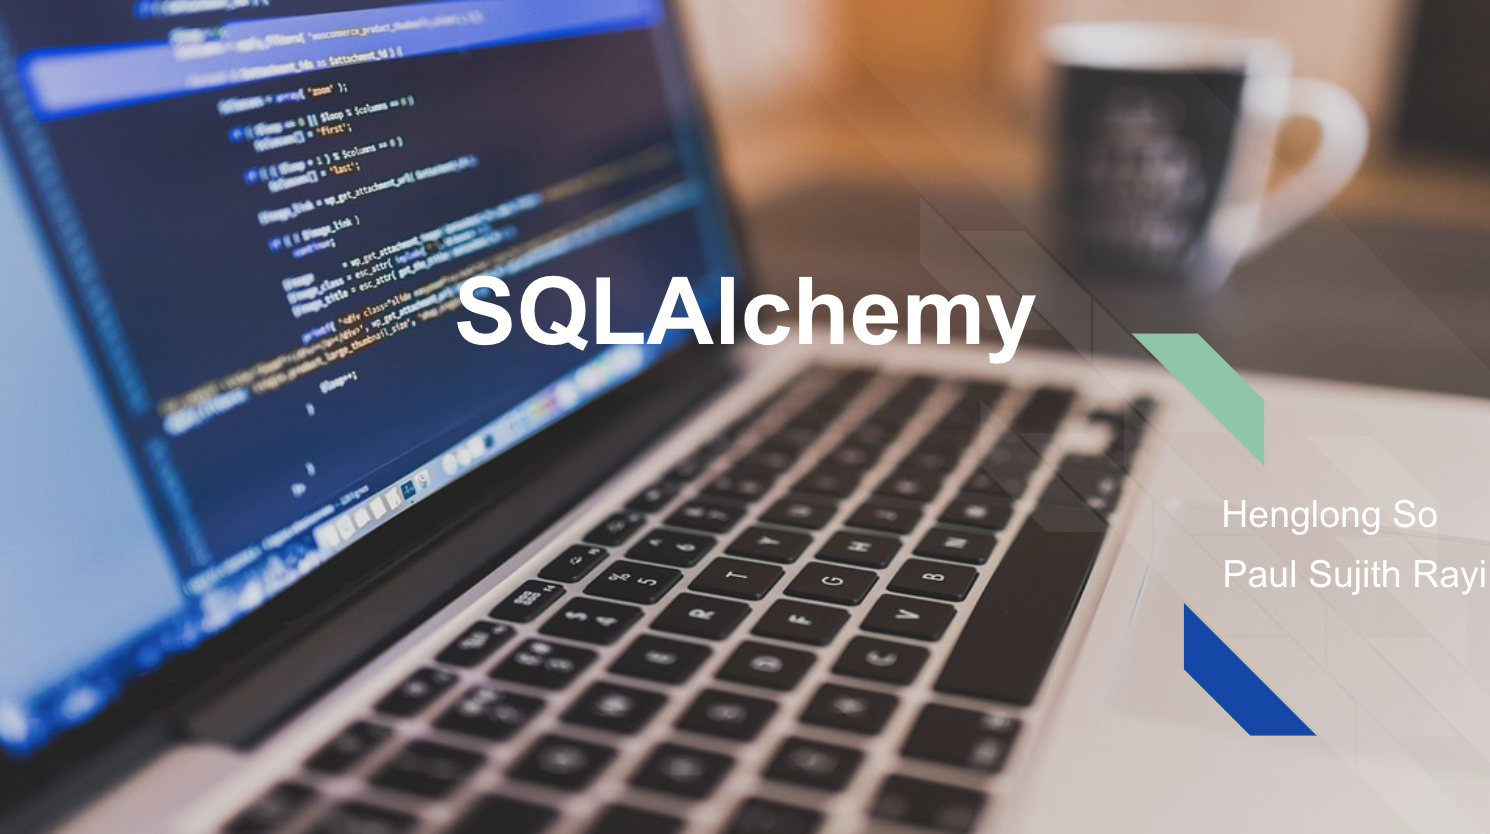

# What is SQLAlchemy

# Case study 
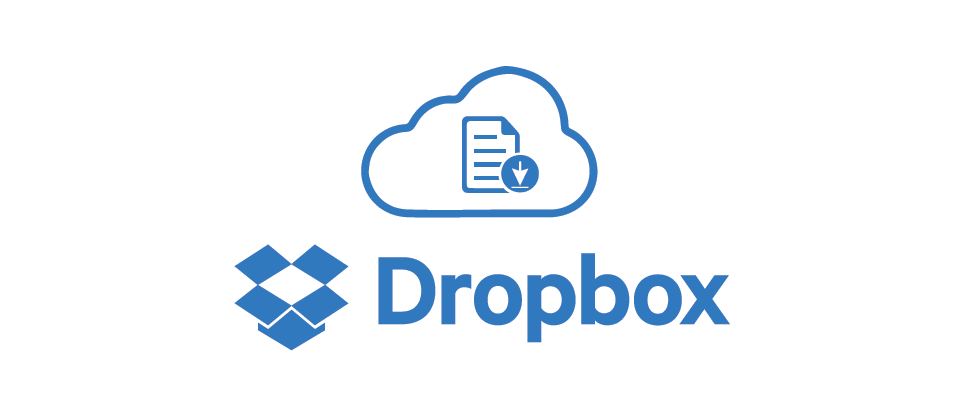

1. Dropbox is the widely successful file sharing platform were early adopters of SQLAlchemy
2. They successfully scale out to over 50 Million+ users using a custom-built SQLAlchemy Core approach on top of    
   MySQL
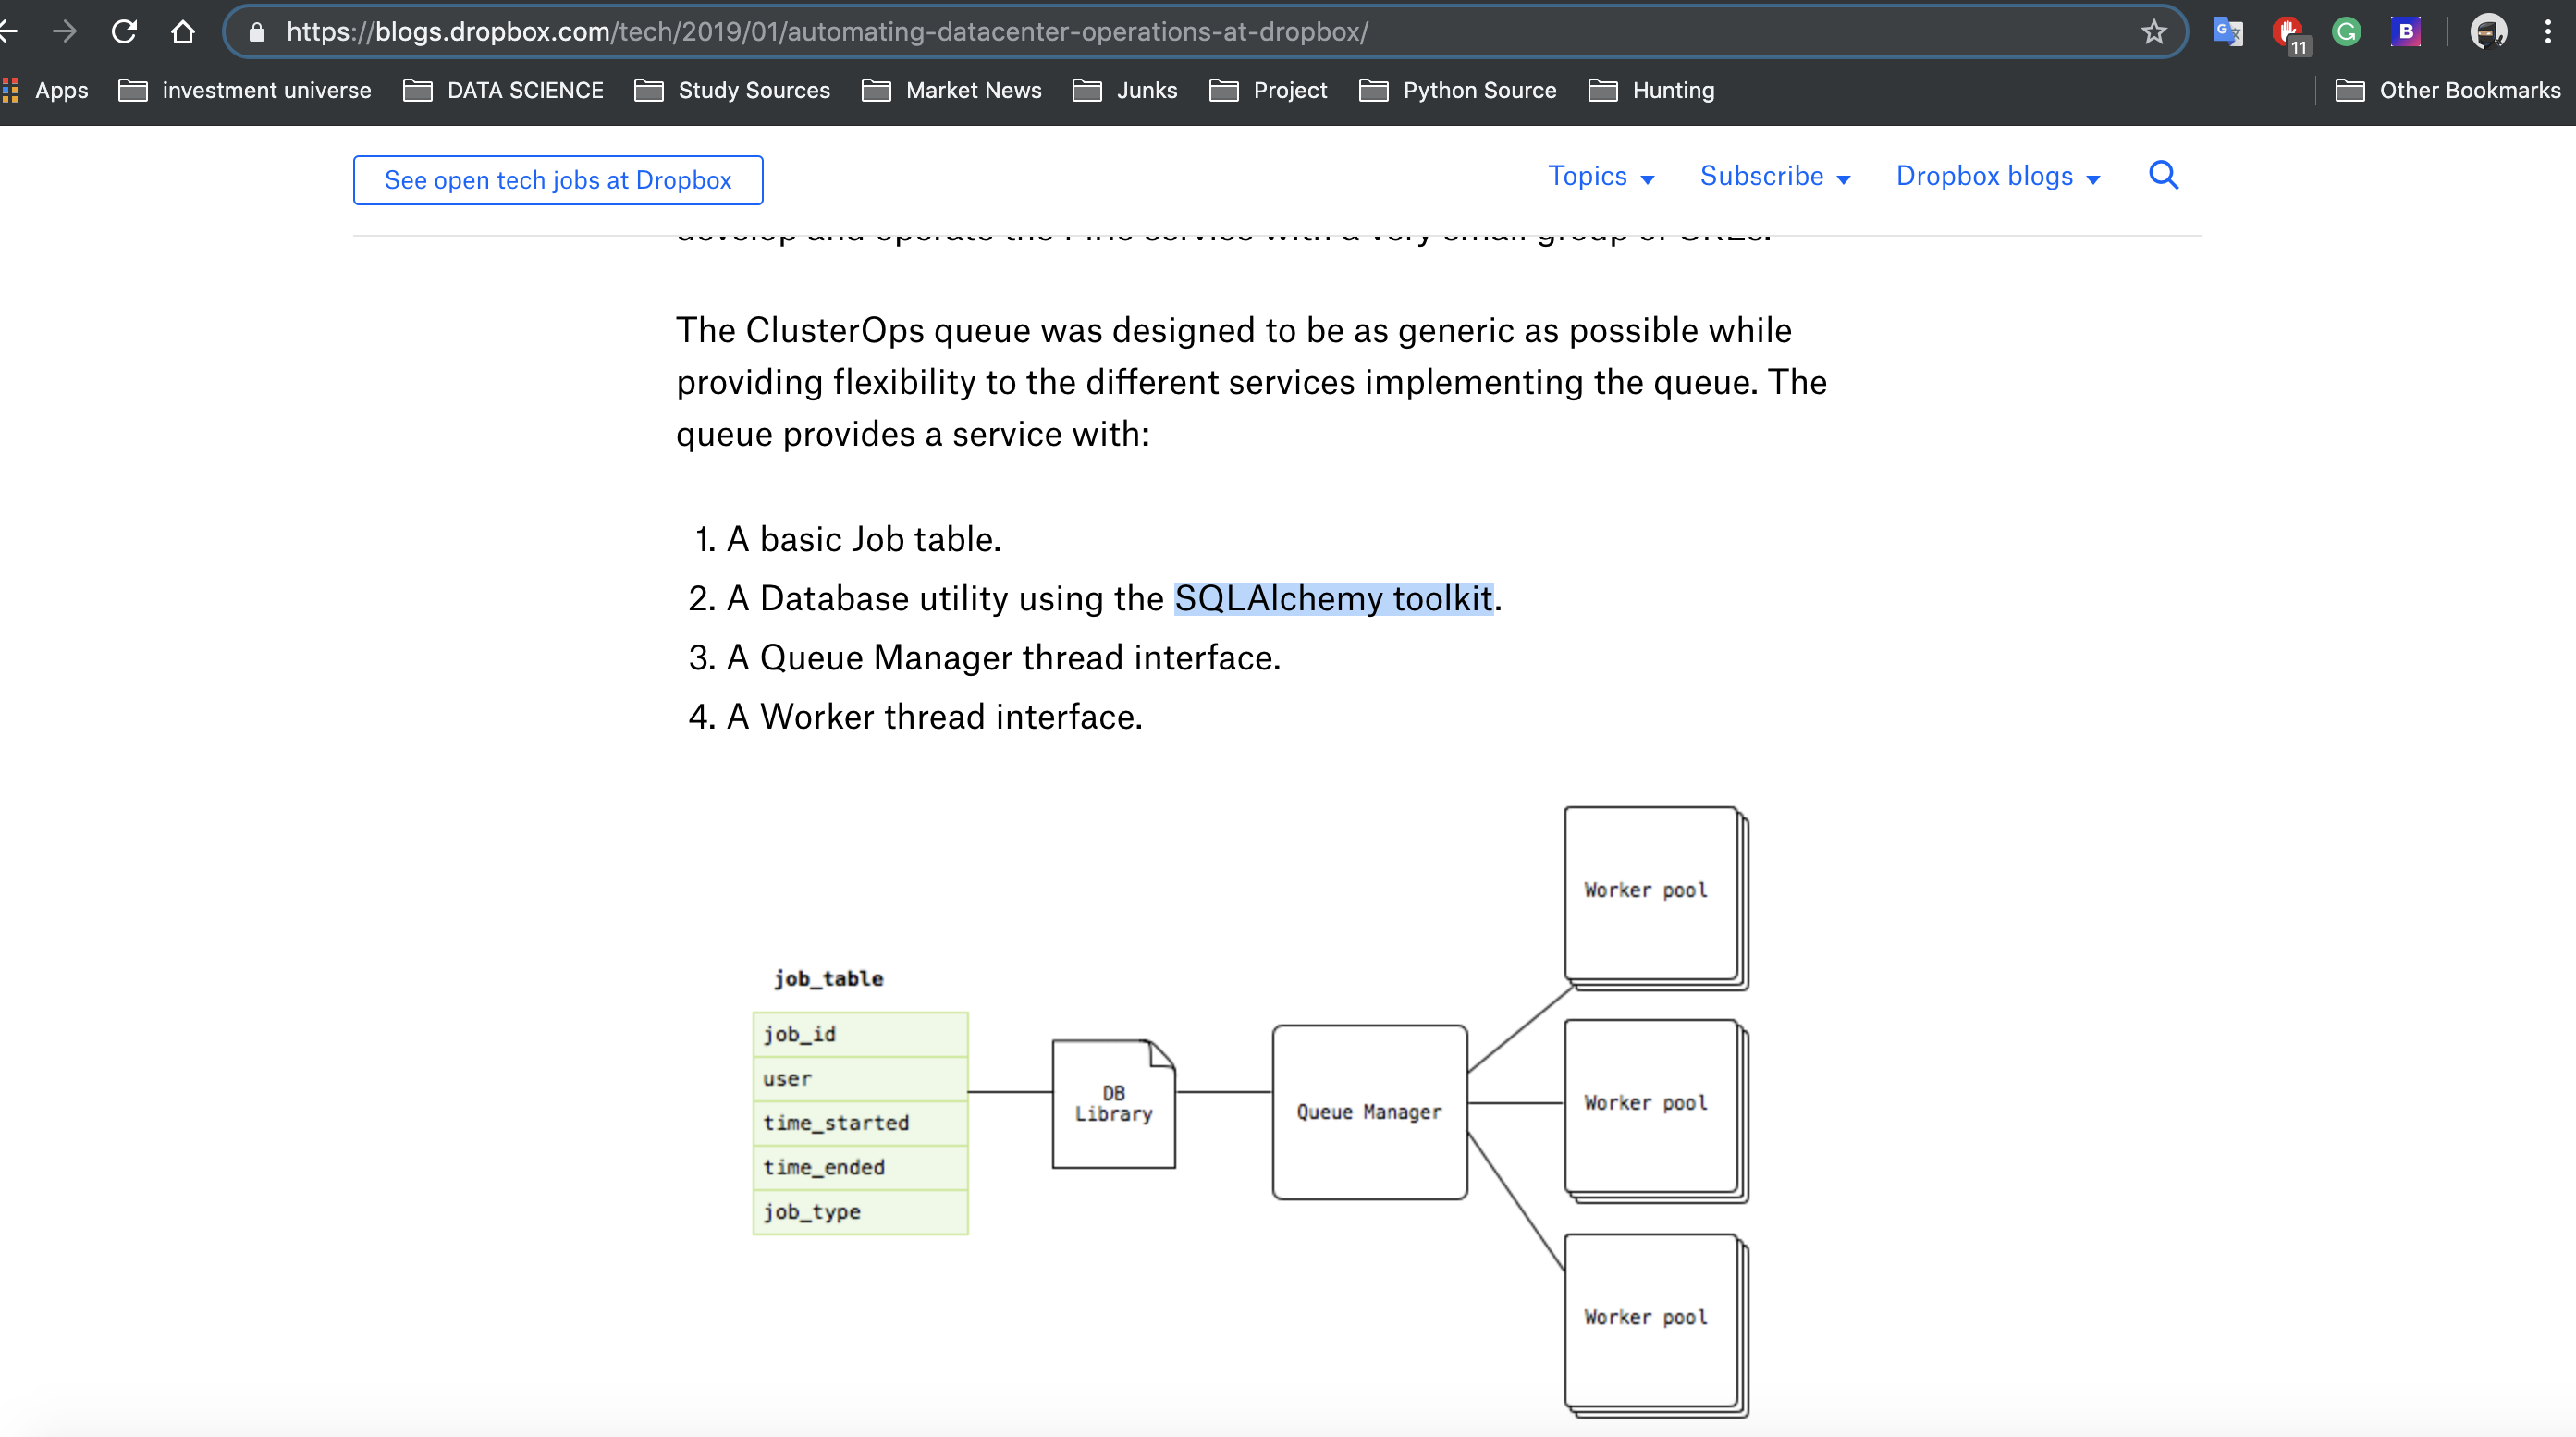 

# Creating Database and Table

In [1]:
#we are importing sqlalchemy which is in built package in jupyter notebook
import sqlalchemy as db
#we are importing pandas package into jupyter notebook 
import pandas as pd

In [2]:
#here we are creating a databse called test which is an sqlite database and we are using create_engine function to do
#so. it creates an interface for mapping the api using which we access our sql code
engine = db.create_engine('sqlite:///test.sqlite') 
#we are procuring a connection resourse using the engine.connect function and storing it in a variable
connection = engine.connect()
#we use MetaData function which is a container object and consists of many essential sql features
metadata = db.MetaData()
#we are now creating a table called emp with its columns, their data types and whether they can hold null values or no
emp = db.Table('emp', metadata,
              db.Column('Id', db.Integer()),
              db.Column('name', db.String(255), nullable=False),
              db.Column('salary', db.Float(), default=100.0),
              db.Column('employee', db.Boolean(), default=True)
              )
#we use the create_all function to do so
metadata.create_all(engine) 

In [3]:
#Inserting record one by one
query = db.insert(emp).values(Id=1, name='Ben', salary=150000.00, employee=True) 
#we use the execute function to execute the query 
ResultProxy = connection.execute(query)

In [4]:
#we are using the execute and fetchall functions to retrieve all the records in our table and store it in a variable
results = connection.execute(db.select([emp])).fetchall()
#we convert the table into a dataframe using the DataFrame function and store it in a variable
df = pd.DataFrame(results)
#we are assigning the keys to be our columns here
df.columns = results[0].keys()
#we are viewing our database now
df

,Id,name,salary,employee
0,1,Ben,150000.0,True


# Inserting Data

In [5]:
#Inserting many records at once using the insert function of sqlalchemy
query = db.insert(emp) 
#we are creating a list of dictionaries and storing it in a variable
values_list = [{'Id':'2', 'name':'Kevin', 'salary':80000, 'employee':False},
               {'Id':'3', 'name':'Michel', 'salary':70000, 'employee':True},
               {'Id':'4', 'name':'henglong', 'salary':100000, 'employee':True},
               {'Id':'5', 'name':'Paul', 'salary':120000, 'employee':True}]
#we are executing the query using the execute function
ResultProxy = connection.execute(query,values_list)

In [6]:
#we are using the execute and fetchall functions to retrieve all the records in our table and store it in a variable
results = connection.execute(db.select([emp])).fetchall()
#we convert the table into a dataframe using the DataFrame function and store it in a variable
df = pd.DataFrame(results)
#we are assigning the keys to be our columns here
df.columns = results[0].keys()
#we are viewing our database now
df

,Id,name,salary,employee
0,1,Ben,150000.0,True
1,2,Kevin,80000.0,False
2,3,Michel,70000.0,True
3,4,henglong,100000.0,True
4,5,Paul,120000.0,True


# Updating Data

In [7]:
# Building a statement to update the salary to 200000
query = db.update(emp).values(salary = 200000)
#we are updating the record whose employee id = 1
query = query.where(emp.columns.Id == 1)
#we are using the execute function to execute our query
results = connection.execute(query)

In [8]:
#we are using the execute and fetchall functions to retrieve all the records in our table and store it in a variable
results = connection.execute(db.select([emp])).fetchall()
#we convert the table into a dataframe using the DataFrame function and store it in a variable
df = pd.DataFrame(results)
#we are assigning the keys to be our columns here
df.columns = results[0].keys()
#we are viewing our database now
df

,Id,name,salary,employee
0,1,Ben,200000.0,True
1,2,Kevin,80000.0,False
2,3,Michel,70000.0,True
3,4,henglong,100000.0,True
4,5,Paul,120000.0,True


# Deleting Data

In [9]:
# Building a statement to delete where salary < 100000 using the delete and where functions
query = db.delete(emp)
query = query.where(emp.columns.salary < 100000)
#we are executing our query using the execute function 
results = connection.execute(query)

In [10]:
#we are using the execute and fetchall functions to retrieve all the records in our table and store it in a variable
results = connection.execute(db.select([emp])).fetchall()
#we convert the table into a dataframe using the DataFrame function and store it in a variable
df = pd.DataFrame(results)
#we are assigning the keys to be our columns here
df.columns = results[0].keys()
#we are viewing our database now
df

,Id,name,salary,employee
0,1,Ben,200000.0,True
1,4,henglong,100000.0,True
2,5,Paul,120000.0,True


# JOINING TABLES

In [11]:
#First let us re-insert the deleted columns into our table with different employee names
#we are using the insert function
query = db.insert(emp) 
#we are creating a list of dictionaries which contain our values
values_list = [{'Id':'2', 'name':'Linda', 'salary':80000, 'employee':False},
               {'Id':'3', 'name':'Tom', 'salary':70000, 'employee':True}]
#we are using the execute function to execute our query
ResultProxy = connection.execute(query,values_list)

In [12]:
#we are using the execute and fetchall functions to retrieve all the records in our table and store it in a variable
results = connection.execute(db.select([emp])).fetchall()
#we convert the table into a dataframe using the DataFrame function and store it in a variable
df = pd.DataFrame(results)
#we are assigning the keys to be our columns here
df.columns = results[0].keys()
#we are viewing our database now
df

,Id,name,salary,employee
0,1,Ben,200000.0,True
1,4,henglong,100000.0,True
2,5,Paul,120000.0,True
3,2,Linda,80000.0,False
4,3,Tom,70000.0,True


In [13]:
#Now let us create a new table
dep = db.Table('dep', metadata,
              db.Column('dep_name', db.String(255), nullable=False),
              db.Column('Id', db.Integer())
              )
#we use the create_all function to do so
metadata.create_all(engine)

In [14]:
#Now let us insert values into this new table using the insert function and the list of dictionaries
query = db.insert(dep) 
values_list = [{'dep_name':'sales', 'Id':'1'},
               {'dep_name':'marketing', 'Id':'4'},
               {'dep_name':'tax', 'Id':'5'},
               {'dep_name':'audit', 'Id':'2'},
               {'dep_name':'data', 'Id':'3'}]
#we are using the execute function to execute our query
ResultProxy = connection.execute(query,values_list)

In [15]:
#we are using the execute and fetchall functions to retrieve all the records in our table and store it in a variable
results = connection.execute(db.select([dep])).fetchall()
#we convert the table into a dataframe using the DataFrame function and store it in a variable
df = pd.DataFrame(results)
#we are assigning the keys to be our columns here
df.columns = results[0].keys()
#we are viewing our database now
df

,dep_name,Id
0,sales,1
1,marketing,4
2,tax,5
3,audit,2
4,data,3


In [16]:
#we are using the read_sql function to read the sql queries into the database
df = pd.read_sql('select emp.Id, emp.name, emp.salary, dep.dep_name from dep, emp where emp.Id = dep.Id',engine)
df.head()

,Id,name,salary,dep_name
0,1,Ben,200000.0,sales
1,4,henglong,100000.0,marketing
2,5,Paul,120000.0,tax
3,2,Linda,80000.0,audit
4,3,Tom,70000.0,data


# Thank You!